In [1]:
%load_ext autoreload
%autoreload 2

from mcmc import *
import numpy as np
import networkx as nx
import pandas as pd
import seaborn as sns
from scipy.stats import gaussian_kde

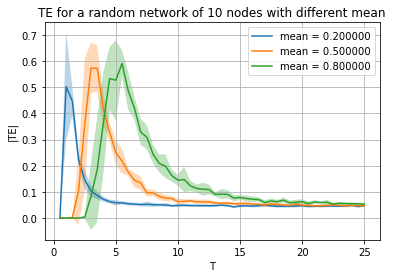

In [10]:
mean_list = [0.2, 0.5, 0.8]
temperatures = np.linspace(0.5, 25, 50)
for mean in mean_list:
    n = 10
    J = mean_matrix(n, mean)
    C= []
    C_std = []
    for T in temperatures:
        x = np.zeros(n)
        for i in range(0, n):
            spins = random_spins(n)        
            _, list_avg_magnetisation, list_sus, spins_timeseries = metropolis(spins,2500, T, J, 500) 
            x[i] = TE(spins_timeseries, J)
        C_std.append(np.std(x))
        C.append(np.abs(np.mean(x)))
    lower_bound = np.subtract(C, C_std)
    upper_bound = np.add(C, C_std)
    plt.plot(temperatures, C,  label = "mean = %f" %mean)
    plt.fill_between(temperatures, lower_bound, upper_bound, alpha=0.3)

plt.ylabel('|TE|')
plt.xlabel('T')
plt.grid()
plt.legend()
plt.title('TE for a random network of 10 nodes with different mean')
plt.savefig('10_nodes_TE.png', bbox_inches='tight')
plt.show()

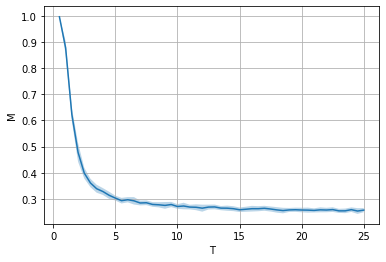

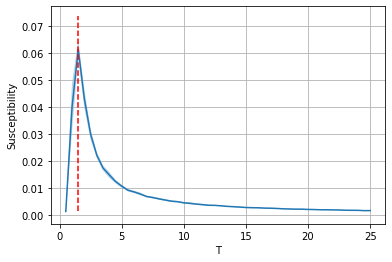

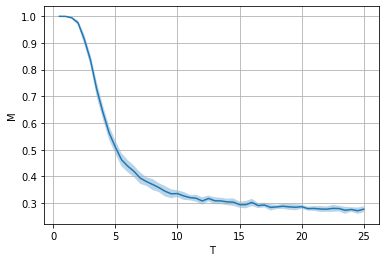

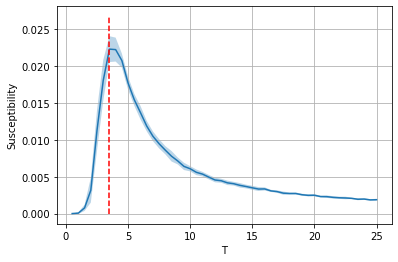

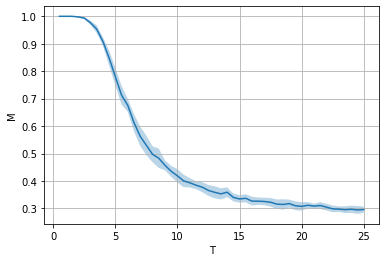

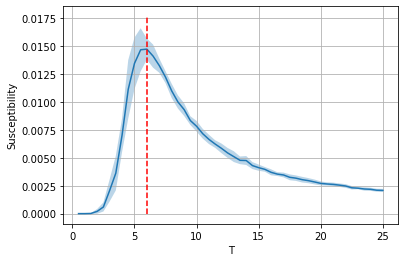

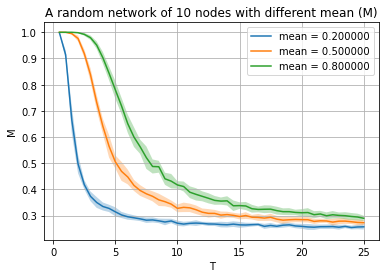

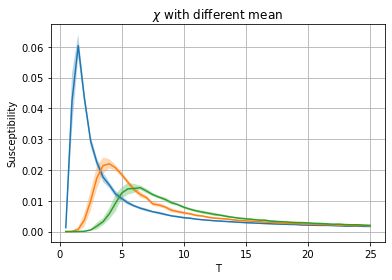

In [23]:
mean_list = [0.2,0.5,0.8]
T_list = np.linspace(0.5, 25, 50)
for mean in mean_list:
    J = mean_matrix(10, mean)
    sims = run_simulation(20, 2500, T_list, 10, J, 500)
    plot_results(sims, T_list, "Susceptibility - mean of J matrix", save=False)
    
for mean in mean_list:
    J = mean_matrix(10, mean)
    sims = run_simulation(20, 2500, T_list, 10, J, 500)
    means_mag, stds_mag, means_sus, stds_sus = sims
    lower_bound = np.subtract(means_mag, stds_mag)
    upper_bound = np.add(means_mag, stds_mag)
    plt.plot(T_list, means_mag, label = "mean = %f" %mean)
    plt.fill_between(T_list, lower_bound, upper_bound, alpha=0.3)

plt.ylabel('M')
plt.xlabel('T')
plt.grid()
plt.legend()
plt.title('A random network of 10 nodes with different mean (M)')
plt.savefig('10_nodes_TE.png', bbox_inches='tight')
plt.show()

for mean in mean_list:
    J = mean_matrix(10, mean)
    sims = run_simulation(20, 2500, T_list, 10, J, 500)
    means_mag, stds_mag, means_sus, stds_sus = sims
    lower_bound = np.subtract(means_sus, stds_sus)
    upper_bound = np.add(means_sus, stds_sus)
    plt.plot(T_list, means_sus, label = "mean = %f" %mean)
    plt.fill_between(T_list, lower_bound, upper_bound, alpha=0.3)

plt.xlabel('T')
plt.ylabel('Susceptibility')
plt.grid()
plt.title("$\chi$ with different mean")
plt.show()